<a href="https://colab.research.google.com/github/smonto43/UTS_MDSI/blob/main/36106MLAA/labs/lab3/MLAA_Lab_3_Exercise_1_Instructions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Lab 3: Categorical Data**


 ## Exercise 1:

The dataset we will be using contains data related to second hand car sales. Your goal is to build a regression model with regularisation to predict accurately the sale price.

You will be loading the dataset from this link:
https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab03/ex1/car_details.csv

The steps are:

1.   Load and Explore Dataset
2.   Data Preparation
3.   Split Datasets
4.   Assess Baseline Model
5.   Train Elastic Model

In [1]:
! pip install -r https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/requirements.txt

### 1. Load and Explore Dataset

**[1.1]** Import the pandas, numpy and altair packages

In [2]:
import pandas as pd
import numpy as np
import altair as alt

**[1.2]** Create a variable called `file_url` containing the link to the CSV file

In [3]:
file_url = 'https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab03/ex1/car_details.csv'

**[1.3]** Load the dataset into dataframe called `df`

In [4]:
df = pd.read_csv(file_url)

**[1.4]** Display the first 5 rows of `df`

In [5]:
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner


**[1.5]** Display the last 5 rows of `df`

In [6]:
df.tail()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner
4339,Renault KWID RXT,2016,225000,40000,Petrol,Individual,Manual,First Owner


**[1.6]** Display the dimensions of `df`

In [7]:
df.shape

(4340, 8)

**[1.7]** Display the descriptive statistics of `df`


In [8]:
df.describe(include = 'all')

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
count,4340,4340.000000,4.340000e+03,4340.000000,4340,4340,4340,4340
unique,1491,NaN,NaN,NaN,5,3,2,5
top,Maruti Swift Dzire VDI,NaN,NaN,NaN,Diesel,Individual,Manual,First Owner
freq,69,NaN,NaN,NaN,2153,3244,3892,2832
mean,NaN,2013.090783,5.041273e+05,66215.777419,NaN,NaN,NaN,NaN
std,NaN,4.215344,5.785487e+05,46644.102194,NaN,NaN,NaN,NaN
min,NaN,1992.000000,2.000000e+04,1.000000,NaN,NaN,NaN,NaN
25%,NaN,2011.000000,2.087498e+05,35000.000000,NaN,NaN,NaN,NaN
50%,NaN,2014.000000,3.500000e+05,60000.000000,NaN,NaN,NaN,NaN
75%,NaN,2016.000000,6.000000e+05,90000.000000,NaN,NaN,NaN,NaN


In [35]:
import seaborn as sns

<Axes: xlabel='selling_price'>

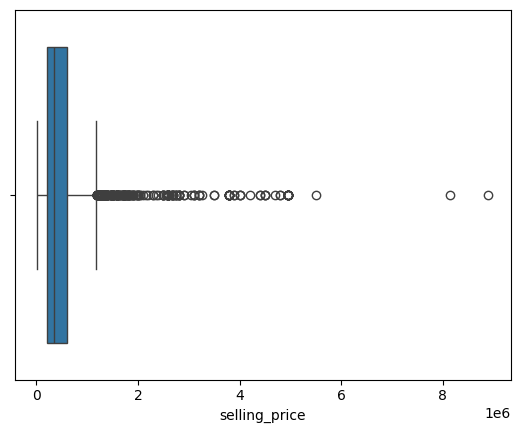

In [36]:
# prompt: box plot of the column selling_price

sns.boxplot(x = df['selling_price'])


<Axes: xlabel='selling_price', ylabel='Count'>

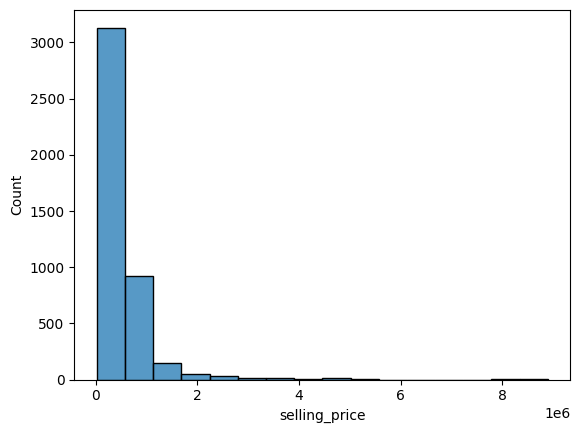

In [37]:
# prompt: distribution of the variable selling_price

sns.histplot(df['selling_price'], bins = 16)


**[1.8]** Display the summary of `df`

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


### 2. Data Preparation

**[2.1]** Create a copy of our dataframe called `df_cleaned`

In [10]:
df_cleaned = df.copy(deep =True)

**[2.2]** Save all the columns names of `df` that are numerical type into a list called `num_cols`

In [11]:
num_cols = ['year', 'selling_price', 'km_driven']

**[2.3]** Save all the columns names of `df` that are ordinal type into a list called `ord_cols`

In [12]:
ord_cols = ['owner']

**[2.4]** Save all the columns names of `df` that are categorical type into a list called `cat_cols`

In [13]:
cat_cols = ['name',  'fuel', 'transmission']


**[2.5]** Iterate through all columns from `ord_cols` and print their list of unique values

In [14]:
for col in ord_cols:
  print(col)
  print(df_cleaned[col].unique())

owner
['First Owner' 'Second Owner' 'Fourth & Above Owner' 'Third Owner'
 'Test Drive Car']


**[2.6]** Create a dictionary mapping the values of `owner` column to an ordinal value

In [15]:
owner_mapper = {
    "Test Drive Car": 0,
    "First Owner": 1,
    "Second Owner": 2,
    "Third Owner": 3,
    "Fourth & Above Owner": 4
}
owner_mapper

{'Test Drive Car': 0,
 'First Owner': 1,
 'Second Owner': 2,
 'Third Owner': 3,
 'Fourth & Above Owner': 4}

**[2.7]** Replace the values of the `owner` column to their corresponsing ordinal value

In [16]:
df_cleaned["owner"] = df_cleaned["owner"].replace(owner_mapper)
df_cleaned["owner"]

0       1
1       1
2       1
3       1
4       2
       ..
4335    2
4336    2
4337    2
4338    1
4339    1
Name: owner, Length: 4340, dtype: int64

**[2.8]** Iterate through all columns from `cat_cols` and print their list of unique values

In [17]:
for col in cat_cols:
  print(col)
  print(df_cleaned[col].unique())

name
['Maruti 800 AC' 'Maruti Wagon R LXI Minor' 'Hyundai Verna 1.6 SX' ...
 'Mahindra Verito 1.5 D6 BSIII'
 'Toyota Innova 2.5 VX (Diesel) 8 Seater BS IV'
 'Hyundai i20 Magna 1.4 CRDi']
fuel
['Petrol' 'Diesel' 'CNG' 'LPG' 'Electric']
transmission
['Manual' 'Automatic']


**[2.9]** Perform one-hot encoding on all categorical columns and save them into a separate DataFrame called `df_cat`

In [18]:
df_cat = pd.get_dummies(df_cleaned[cat_cols])
df_cat

,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,name_Audi A4 3.0 TDI Quattro,name_Audi A4 30 TFSI Technology,name_Audi A4 35 TDI Premium,name_Audi A4 35 TDI Premium Plus,...,name_Volvo XC 90 D5 Inscription BSIV,name_Volvo XC60 D3 Kinetic,name_Volvo XC60 D5 Inscription,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4336,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4337,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4338,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


**[2.10]** Save all the numerical features (using `num_cols` and `ord_cols`) into a variable called `X`

In [19]:
X = df_cleaned[ord_cols + num_cols]

**[2.11]** Combine the one-hot encoded columns contained in `df_cat` into `X`

In [20]:
X = pd.concat([X, df_cat], axis=1)
X

,owner,year,selling_price,km_driven,name_Ambassador CLASSIC 1500 DSL AC,name_Ambassador Classic 2000 Dsz,name_Ambassador Grand 1800 ISZ MPFI PW CL,name_Audi A4 1.8 TFSI,name_Audi A4 2.0 TDI,name_Audi A4 2.0 TDI 177 Bhp Premium Plus,...,name_Volvo XC 90 D5 Inscription BSIV,name_Volvo XC60 D3 Kinetic,name_Volvo XC60 D5 Inscription,fuel_CNG,fuel_Diesel,fuel_Electric,fuel_LPG,fuel_Petrol,transmission_Automatic,transmission_Manual
0,1,2007,60000,70000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,1,2007,135000,50000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
2,1,2012,600000,100000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
3,1,2017,250000,46000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4,2,2014,450000,141000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4335,2,2014,409999,80000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4336,2,2014,409999,80000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
4337,2,2009,110000,83000,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
4338,1,2016,865000,90000,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True


# 3. Split Datasets

**[3.1]** Extract the target variable into a variable called `y`

Note: If you are stuck in previous steps, you can dowload the content of df_cleaned here: https://raw.githubusercontent.com/aso-uts/labs_datasets/main/36106-mlaa/lab03/ex1/df_cleaned.csv

In [21]:
y = X.pop('selling_price')
y

0        60000
1       135000
2       600000
3       250000
4       450000
         ...  
4335    409999
4336    409999
4337    110000
4338    865000
4339    225000
Name: selling_price, Length: 4340, dtype: int64

**[3.2]** Import train_test_split from sklearn.model_selection

In [22]:
from sklearn.model_selection import train_test_split

**[3.3]** Split the features and target variable into 2 different sets (data and test) with 80-20 ratio

In [23]:
X_data, X_test, y_data, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

**[3.4]** Split the features and target variable into 2 different sets (training and validation) with 80-20 ratio

In [24]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

### 4. Assess Baseline Model

**[4.1]** Calculate the average of the target variable and save the result into a variable called `y_mean`

In [25]:
y_mean = y.mean()

**[4.2]** Create a numpy array called `y_base` filled with the value contained in `y_mean` that have the same dimensions as `y_train`

In [26]:
y_base = np.full(y_train.shape, y_mean)


**[4.3]** Import the MSE and MAE from sklearn

In [27]:
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

**[4.4]** Display the RMSE and MAE scores of this baseline model

In [28]:
print(mse(y_train,y_base, squared = False))
print(mae(y_train,y_base))

584770.3143039515
327400.6763475812


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

### 5. Train Elastic Model

**[5.1]** Import the ElasticNet module from sklearn

In [29]:
from sklearn.linear_model import ElasticNet

**[5.2]** Instantiate the ElasticNet class into a variable called `elasticnet_reg` and fit it on the training set

In [31]:
elasticnet_reg = ElasticNet()
elasticnet_reg.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(

ElasticNet()

**[5.3]** Use the trained model to predict the outcome on `X_train` and save the results into a variable called `y_preds`

In [33]:
y_preds = elasticnet_reg.predict(X_train)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


**[5.4]** Import the MSE and MAE metrics from sklearn and display the RMSE and MAE scores on the training set

In [34]:
print(mse(y_train,y_preds, squared = False))
print(mae(y_train,y_preds))

478025.34960157855
243873.10254931962


/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtyp

**[5.5]** Save the predictions on the validation set into a variable called `y_val_preds` and display the RMSE and MAE scores

In [ ]:
# Placeholder for student's code

**[5.6]** Display the predictions versus the target line charts on the training set

In [ ]:
# Placeholder for student's code

**[5.7]** Display the predictions versus the target line charts on the validation set

In [ ]:
# Placeholder for student's code